# 앤스콤 데이터 집합 불러오기

In [23]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

# matplotlib 라이브러리로 간단한 그래프 그리기

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
!pip install matplotlib-inline==0.1.7

In [48]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

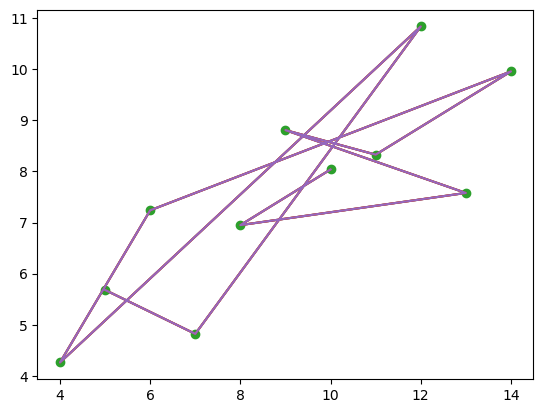

In [58]:
plt.plot(dataset_1['x'],dataset_1['y'])
plt.show()

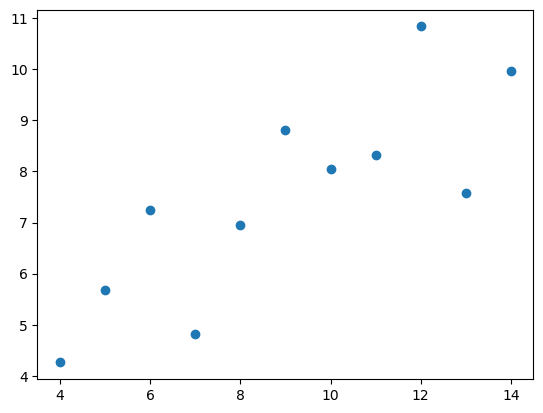

In [60]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')
plt.show()

# 한 번에 4개의 그래프 그리기

In [84]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

In [86]:
fig = plt.figure()

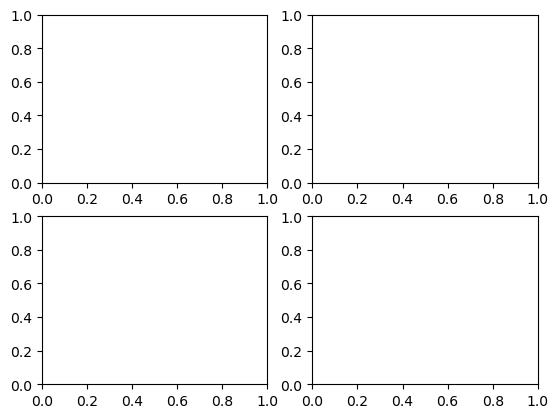

In [88]:
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)
plt.show()

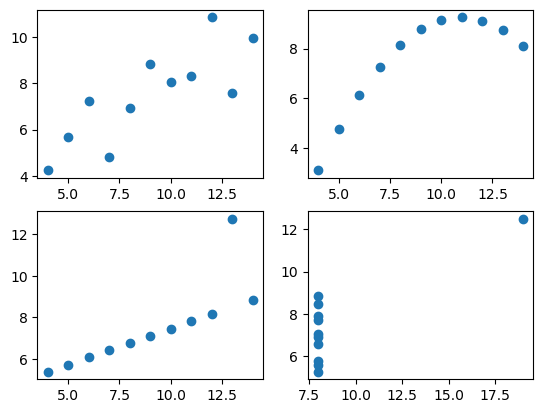

In [90]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

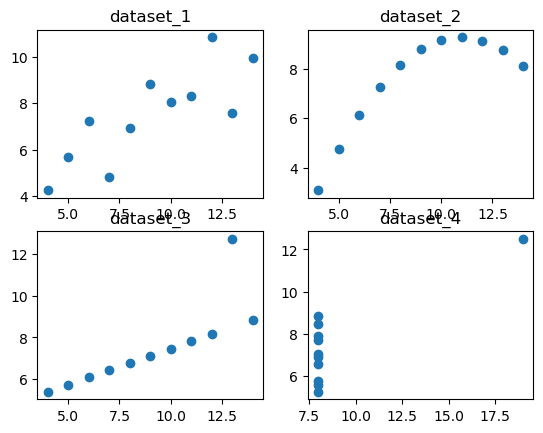

In [92]:
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig

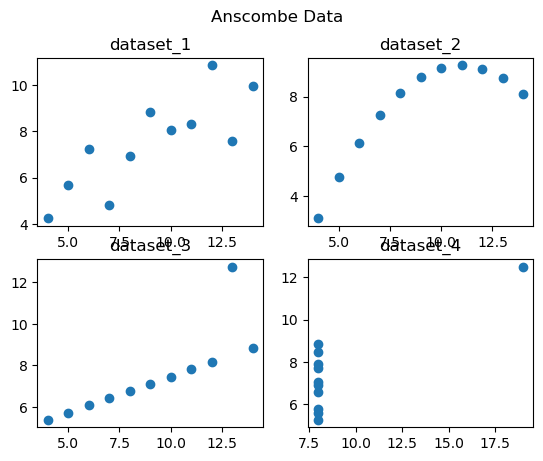

In [98]:
fig.suptitle("Anscombe Data")

fig

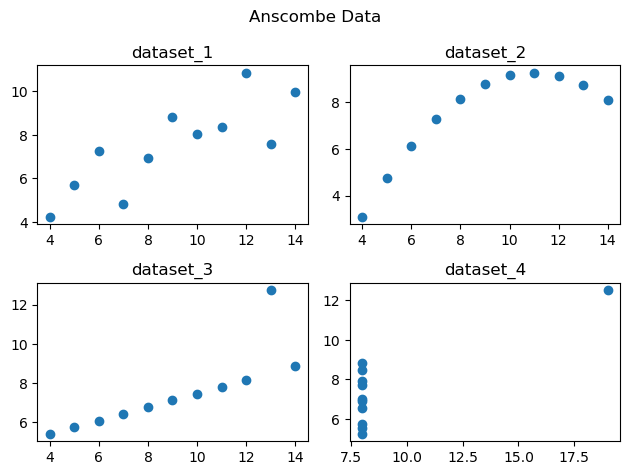

In [102]:
fig.tight_layout()

fig

# 기초 그래프 그리기 - 히스토그램, 산점도, 박스 그래프

In [104]:
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


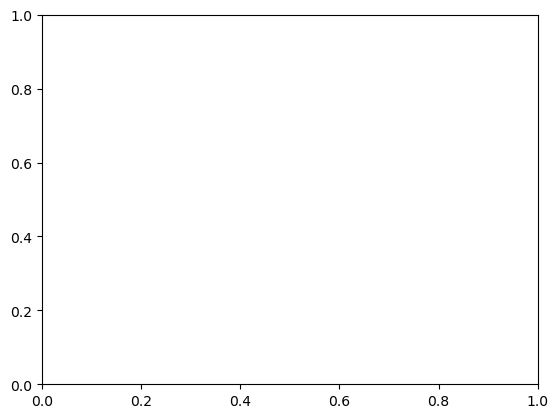

In [108]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

fig

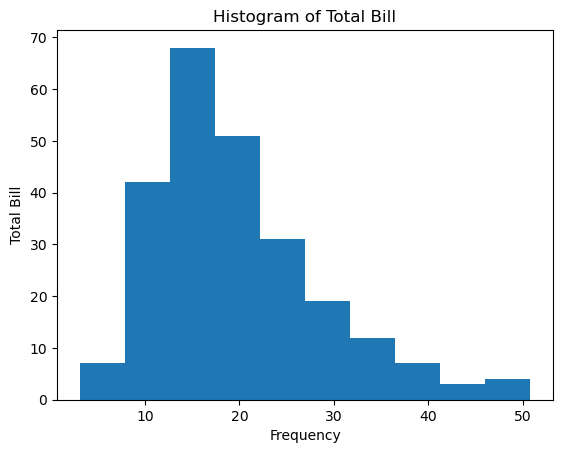

In [110]:
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

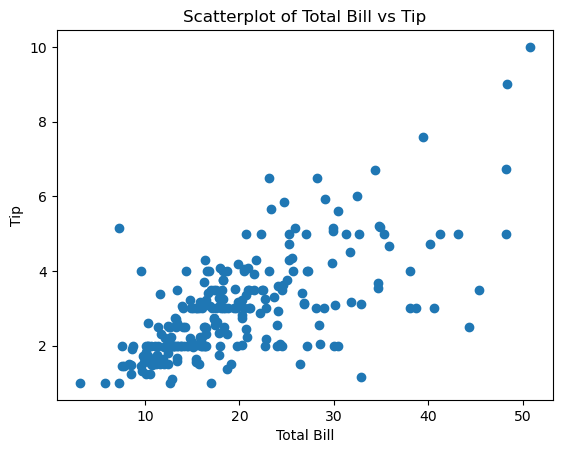

In [128]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

scatter_plot

C:\Users\seulo\AppData\Local\Temp\ipykernel_4932\3463080249.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],


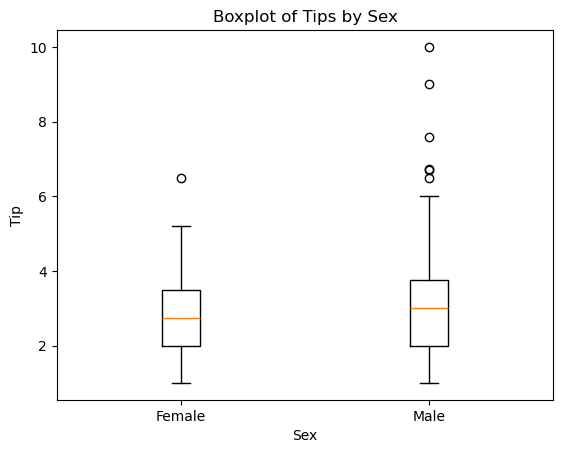

In [142]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
               tips[tips['sex'] == 'Male']['tip']],
                labels=['Female','Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

boxplot

# 단변량 그래프 그리기 - 히스토그램

In [192]:
import seaborn as sns

tips = sns.load_dataset("tips")

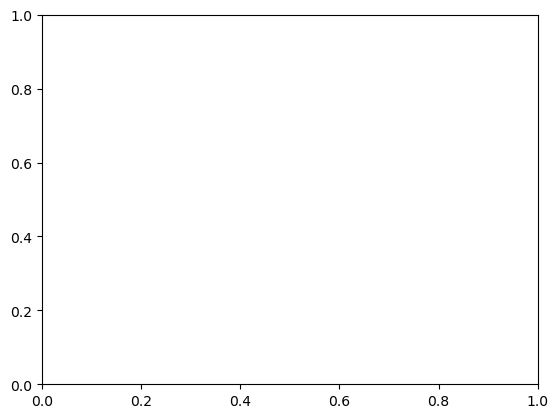

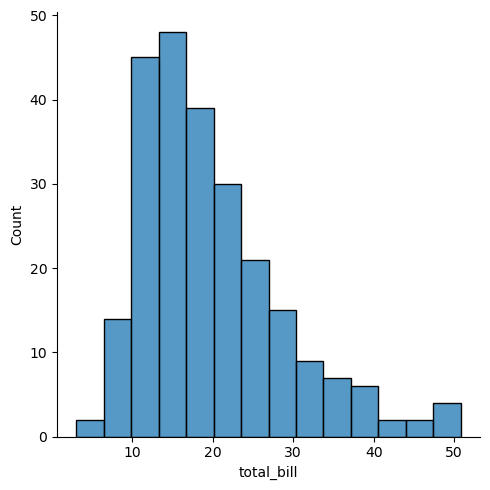

In [214]:
ax = plt.subplots();
ax = sns.displot(tips['total_bill']);
ax.set_titles('Total Bill Histogram with Density Plot');

plt.show()

# 다변량 그래프 그리기

In [144]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

In [146]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

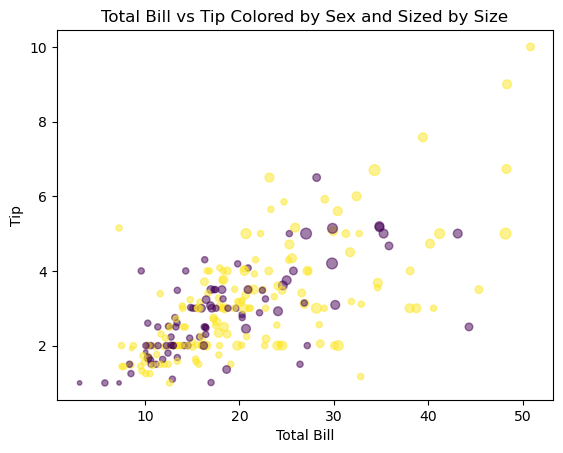

In [152]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10,
    c=tips['sex_color'],
    alpha=0.5)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

scatter_plot

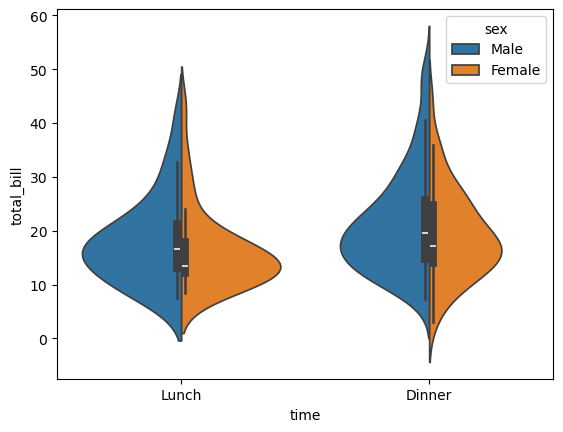

In [206]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill',hue='sex',data=tips,split=True);

plt.show()

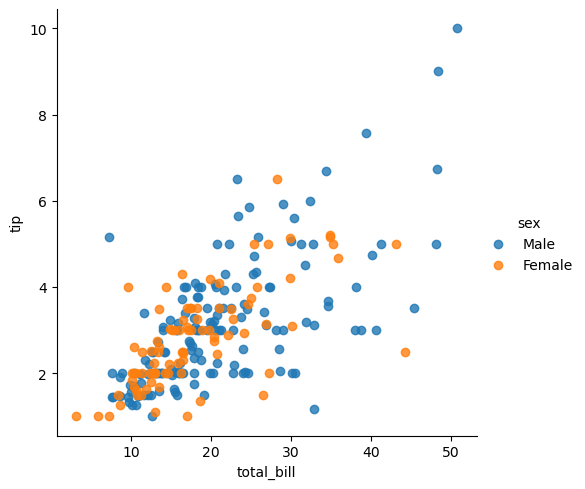

In [220]:
scatter = sns.lmplot(x='total_bill', y='tip',data=tips,hue='sex',fit_reg=False);
plt.show()

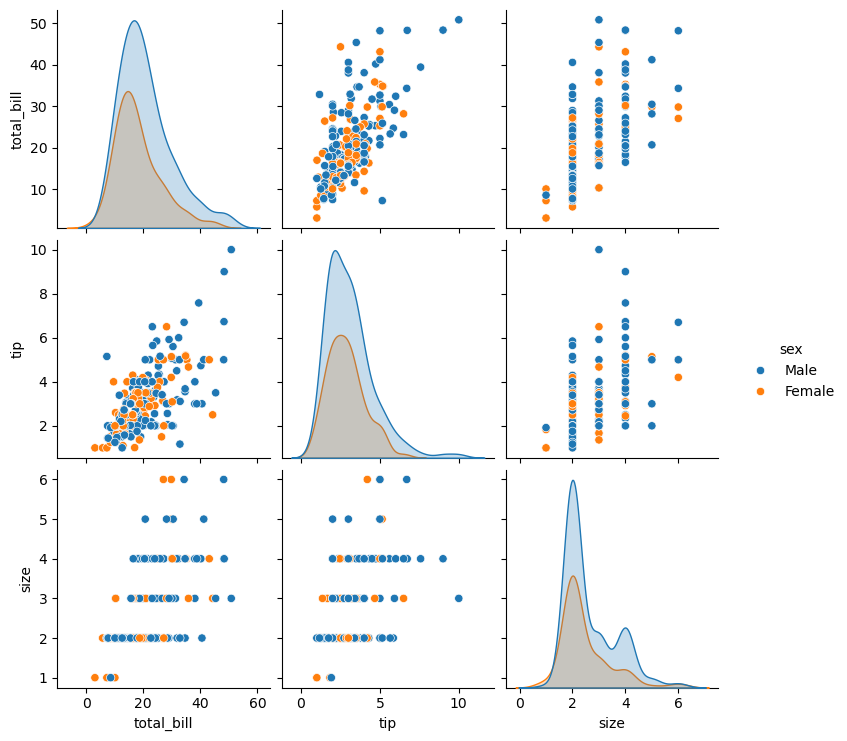

In [226]:
fig = sns.pairplot(tips, hue='sex');
plt.show()

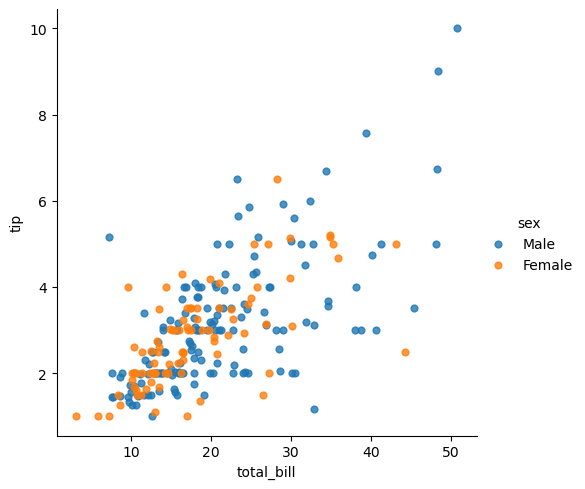

In [254]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                     scatter_kws={'s':24});

plt.show()

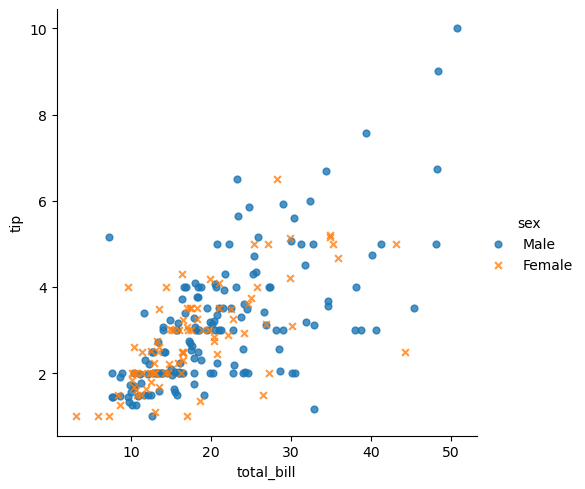

In [264]:
scatter=sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                 markers=['o', 'x'], scatter_kws={'s': 24});
plt.show()

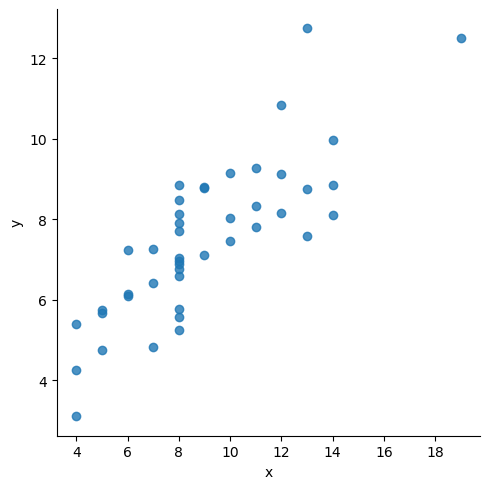

In [272]:
anacombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg = False);
plt.show()

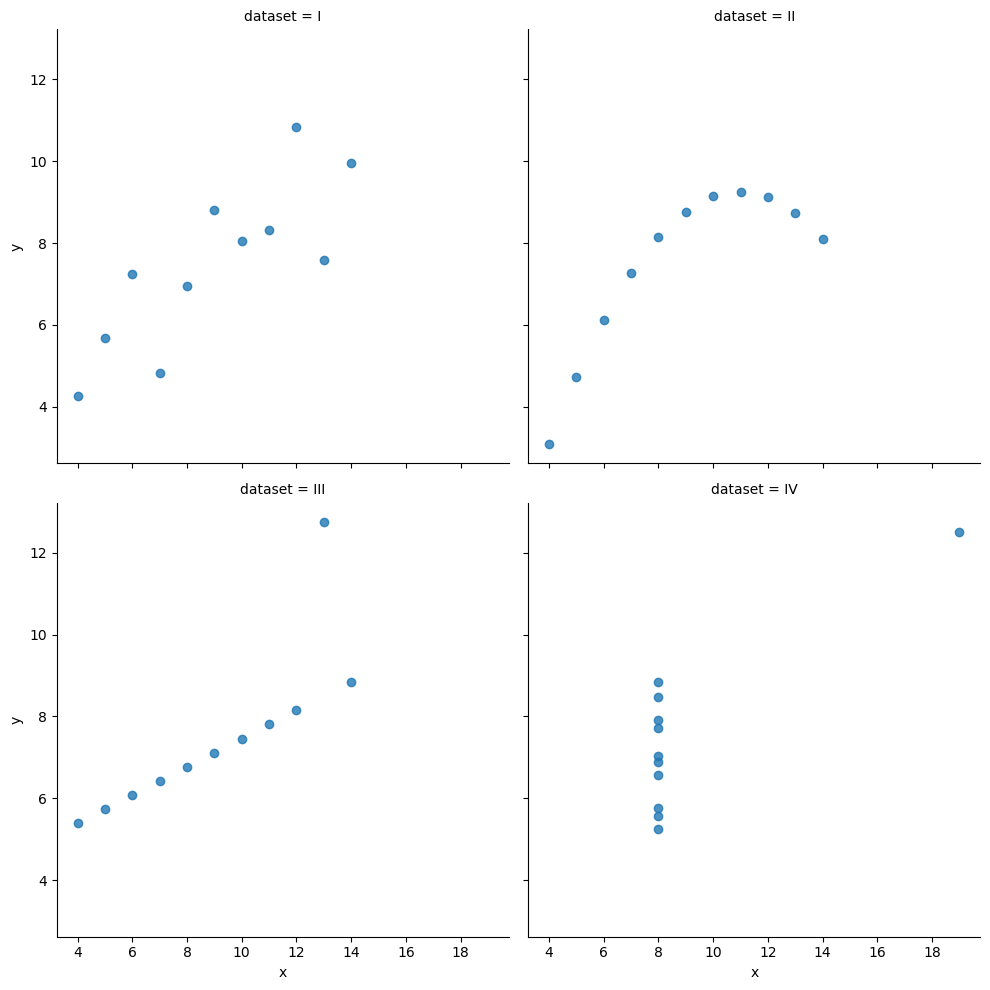

In [274]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False,
                           col='dataset', col_wrap=2);
plt.show()

# 데이터프레임과 시리즈로 그래프 그리기

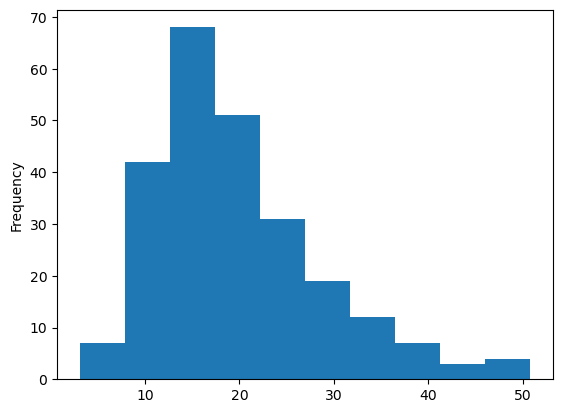

In [304]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist();

plt.show()

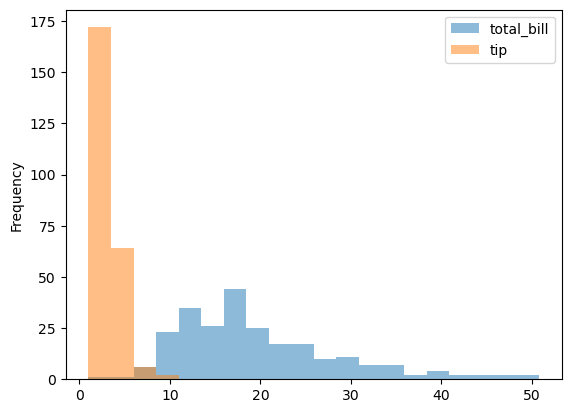

In [310]:
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax);

plt.show()

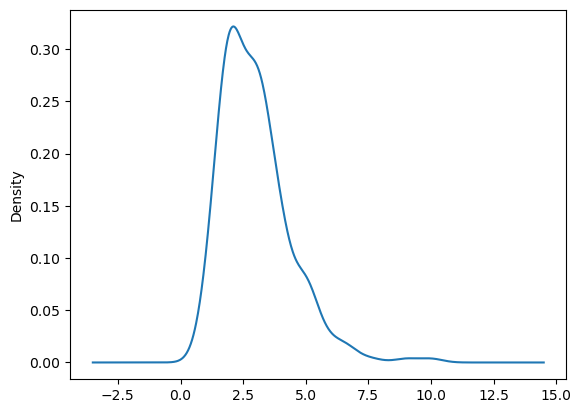

In [312]:
ax = plt.subplots()
ax = tips['tip'].plot.kde();

plt.show()

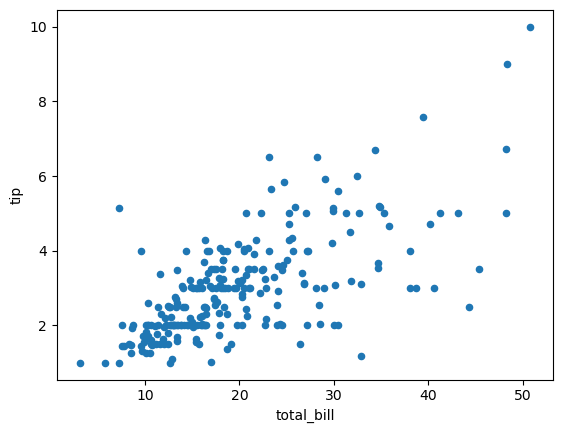

In [314]:
fig,ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax);

plt.show()

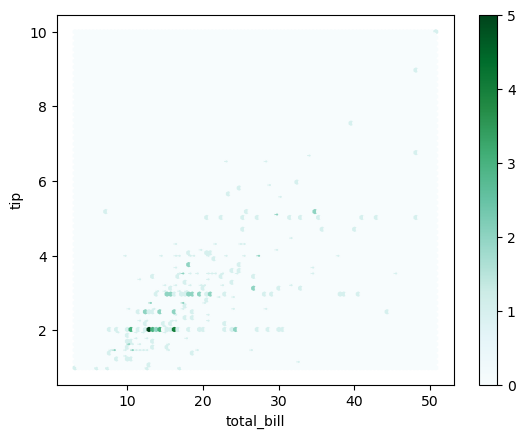

In [320]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip',ax=ax)
plt.show()

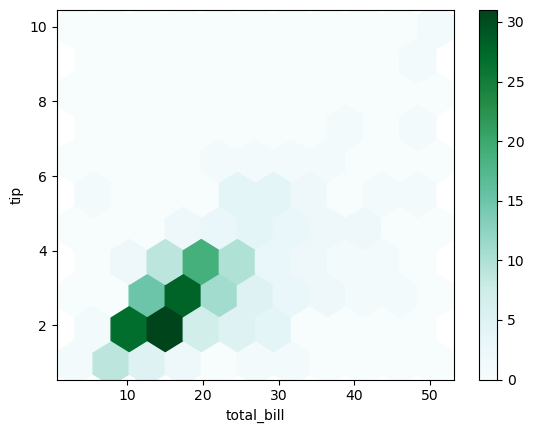

In [322]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip',gridsize=10,ax=ax);
plt.show()

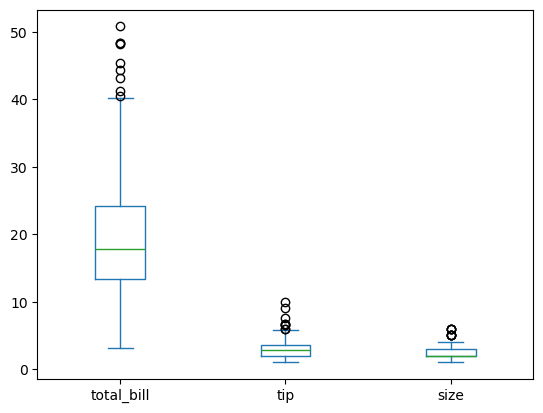

In [324]:
fig,ax = plt.subplots()
ax = tips.plot.box(ax=ax);
plt.show()

# 알아두면 좋아요

C:\Users\seulo\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\seulo\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


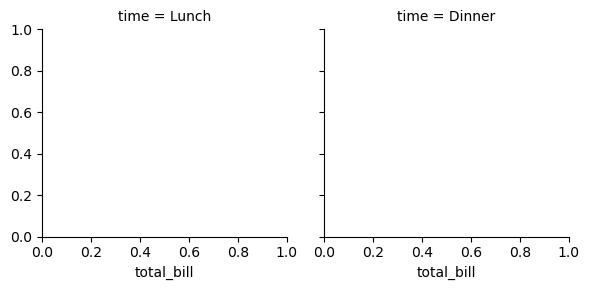

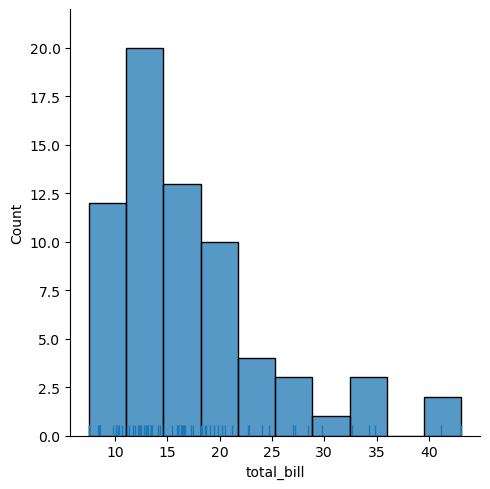

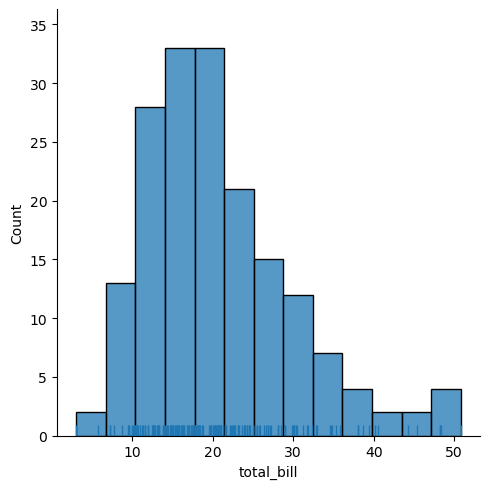

In [292]:
facet = sns.FacetGrid(tips,col='time');
facet.map(sns.displot, 'total_bill',rug=True);

plt.show()

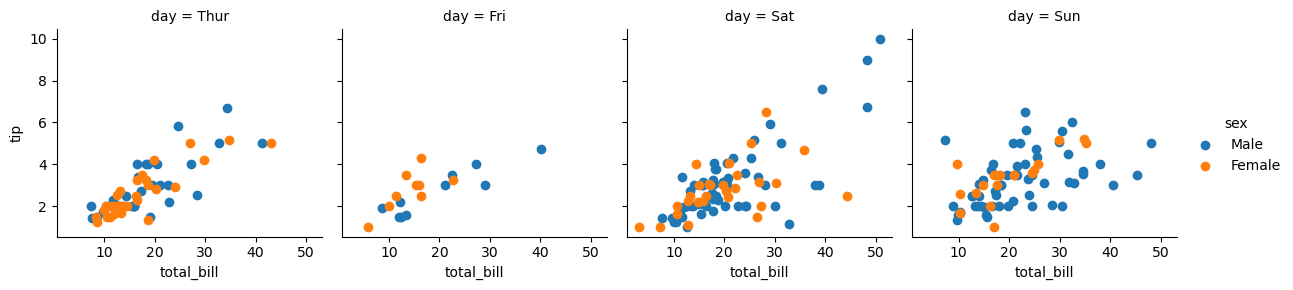

In [294]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

plt.show()

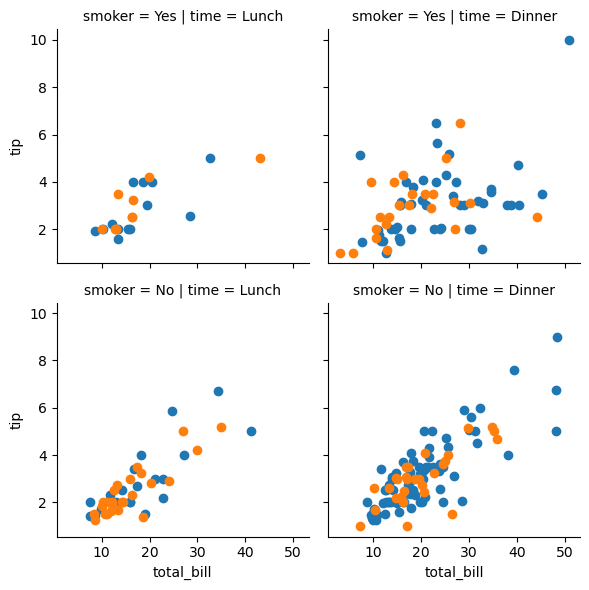

In [296]:
facet=sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

plt.show()